# CS 675 Midterm Project
## Neha F. Kazi, Jimmy R. Najjar, Megan Resurreccion

#### Project Division
Between the three of us, we split the project three ways and focused on our own machine learning algorithm. The results of the following will vary, and we afterwards discussed the results and what was best.

**Import Packages**

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import graphviz
import plotly.express as px
from sklearn import metrics, neighbors, preprocessing, model_selection, datasets, svm, cluster, datasets, mixture, tree
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, silhouette_score, calinski_harabasz_score
from sklearn.metrics.cluster import completeness_score, homogeneity_score
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances,cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
pd.options.display.max_rows = 50
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
train_df = pd.read_csv('train.csv')
train_df.shape

(1460, 81)

In [210]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1459, 80)

**Replace string values with numerical ones**

In [3]:
train_df['LotFrontage'].fillna('NA',inplace=True)
train_df['LotFrontage'].fillna('Alley',inplace=True)
train_df['MasVnrType'].fillna('NA',inplace=True)
train_df['MasVnrArea'].fillna('NA',inplace=True)
train_df['BsmtQual'].fillna('NA',inplace=True)
train_df['BsmtCond'].fillna('NA',inplace=True)
train_df['BsmtExposure'].fillna('NA',inplace=True)
train_df['BsmtFinType1'].fillna('NA',inplace=True)
train_df['BsmtFinType2'].fillna('NA',inplace=True)
train_df['Electrical'].fillna('NA',inplace=True)
train_df['GarageType'].fillna('NA',inplace=True)
train_df['GarageYrBlt'].fillna('NA',inplace=True)
train_df['GarageFinish'].fillna('NA',inplace=True)
train_df['GarageQual'].fillna('NA',inplace=True)
train_df['GarageCond'].fillna('NA',inplace=True)
train_df['FireplaceQu'].fillna('NA',inplace=True)
train_df['PoolQC'].fillna('NA',inplace=True)
train_df['Fence'].fillna('NA',inplace=True)
train_df['MiscFeature'].fillna('NA',inplace=True)
train_df['Alley'].fillna('NA',inplace=True)

In [4]:
pavement = {'Y': 1.0, 'P': 0.5, 'N': 0}
train_df.PavedDrive = [pavement[item] for item in train_df.PavedDrive]

In [5]:
function = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train_df.Functional = [function[item] for item in train_df.Functional]


In [6]:
util = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
train_df.Utilities = [util[item] for item in train_df.Utilities]


In [7]:
bsmtex = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
train_df.BsmtExposure = [bsmtex[item] for item in train_df.BsmtExposure]

In [8]:
air = {'Y': 1, 'N': 0}
train_df.CentralAir = [air[item] for item in train_df.CentralAir]

In [9]:
fen = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
train_df.Fence = [fen[item] for item in train_df.Fence]

In [10]:
rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.BsmtQual = [rating[item] for item in train_df.BsmtQual]
train_df.BsmtCond = [rating[item] for item in train_df.BsmtCond]
train_df.KitchenQual = [rating[item] for item in train_df.KitchenQual]
train_df.HeatingQC = [rating[item] for item in train_df.HeatingQC]
train_df.FireplaceQu = [rating[item] for item in train_df.FireplaceQu]
train_df.PoolQC = [rating[item] for item in train_df.PoolQC]

**New Feature 1: Average of OverallQual and OverallCond**

In [11]:
train_df['OverallRating'] = ((train_df['OverallQual']+train_df['OverallCond'])/2)
train_df['OverallRating'].head()
train_df = train_df.drop(['OverallQual','OverallCond'],axis=1)

**New Feature 2: Total Square Feet of 1st and 2nd Floors**

In [12]:
train_df['TotalFloorSqFt'] = train_df['1stFlrSF']+train_df['2ndFlrSF']
train_df['TotalFloorSqFt'].head()
train_df = train_df.drop(['1stFlrSF','2ndFlrSF'],axis=1)

**New Feature 3: Total Outdoor Porch and Deck Square Feet**

In [13]:
train_df['TotalPorchDeckSqFt'] = (train_df['WoodDeckSF']+train_df['OpenPorchSF']
                                +train_df['EnclosedPorch']+train_df['3SsnPorch']
                                +train_df['ScreenPorch'])

train_df = train_df.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)


**New Feature 4: Garage Overall Quality**

In [14]:
garage = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.GarageQual = [garage[item] for item in train_df.GarageQual]
train_df.GarageCond = [garage[item] for item in train_df.GarageCond]

train_df['GarageOverall'] = ((train_df['GarageQual']+train_df['GarageCond'])/2)

train_df = train_df.drop(['GarageQual','GarageCond'],axis=1)

**New Feature 5: Exterior Overall Quality**

In [15]:
exterior = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.ExterQual = [exterior[item] for item in train_df.ExterQual]
train_df.ExterCond = [exterior[item] for item in train_df.ExterCond]

train_df['ExterOverall'] = ((train_df['ExterQual']+train_df['ExterCond'])/2)

train_df = train_df.drop(['ExterQual','ExterCond'],axis=1)

**Overall, we created 5 new features: OverallRating, TotalFloorSqFt, TotalPorchDeckSqFt, GarageOverall, and ExterOverall.**

# Machine Learning Algorithm 1: Naive Bayes (Neha)

## Extracting 'Features' and 'target'
The features of only those columns are used which are providing rich information to get the target variable. Also, all the columns which have the same values for all rows are not included in feature set as they can't help to make predictions.

In [476]:
features =train_df[['MSSubClass','LotArea','SalePrice', 'PoolArea','MSSubClass']]

In [477]:
print(features.shape)

(1460, 5)


In [478]:
target = train_df['SalePrice']

In [479]:
print(target.shape)

(1460,)


## Splitting Dataset

In [480]:
x_train, x_test, y_train, y_test =train_test_split(features,target,test_size=0.25,random_state=0)

## Applying Naive Bayes Algorithm


In [481]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred  =  classifier.predict(x_test)

## Evaluating Performance

In [482]:
cm = metrics.confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

0.5671232876712329


In [483]:
nb_score = classifier.score(x_test, y_test)
print(nb_score)

0.5671232876712329


In [484]:
m = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


## Plotting Confusion Matrix

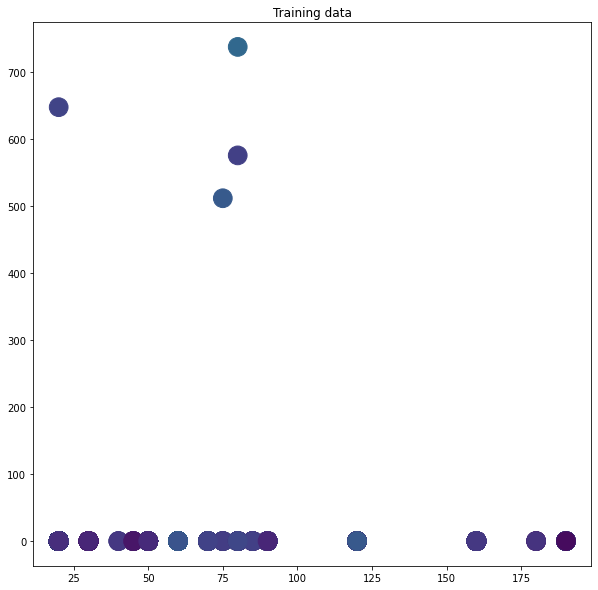

In [485]:
plt.figure(figsize=(10,10))
plt.scatter(x_train.iloc[:,0:1], x_train.iloc[:,3:4], c=y_train[:], s=350, cmap='viridis')
plt.title('Training data')
plt.show()

## Summary
To prepare the dataset, I extract the features matrix and target array from the pandas DataFrame , Affter Splitting dataset, I applied Gaussian Naive Bayes Classifier to predict on a new data. After evaulating the performance to find the accuracy score which is approximately 0.5671. Plotting the Confusion Matrix in a Viridis Map, shows that the when data is abundant, other more complicated models tend to outperform Naive Bayes.

# Machine Learning Algorithm 2:  KNN (Jimmy)

In [409]:
num_vars = train_df.columns[train_df.dtypes != 'object']
obj_vars = train_df.columns[train_df.dtypes == 'object']

SalePrice's skew: 1.8828757597682129
SalePrice's kurt: 6.536281860064529


/Users/meganresurreccion/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


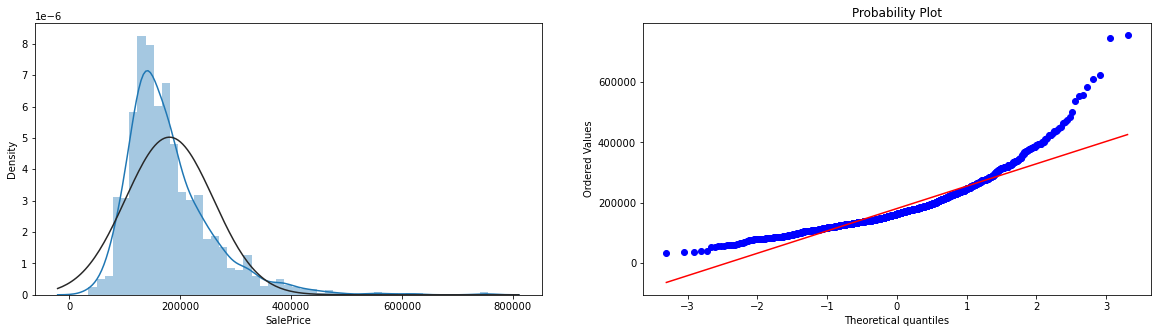

In [412]:
from scipy.stats import norm, probplot
print(f"SalePrice's skew: {train_df.SalePrice.skew()}")
print(f"SalePrice's kurt: {train_df.SalePrice.kurt()}")
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(train_df.SalePrice, fit=norm, ax=ax[0]);
probplot(train_df.SalePrice, plot=ax[1])
plt.show()

In [416]:
pd.DataFrame(num_vars, columns=['num vars']).T

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
num vars,Id,MSSubClass,LotArea,Utilities,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,...,Fence,MiscVal,MoSold,YrSold,SalePrice,OverallRating,TotalFloorSqFt,TotalPorchDeckSqFt,GarageOverall,ExterOverall


In [417]:
pd.DataFrame(obj_vars, columns=['obj vars']).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
obj vars,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtFinType1,BsmtFinType2,Heating,Electrical,GarageType,GarageYrBlt,GarageFinish,MiscFeature,SaleType,SaleCondition


In [420]:
features =train_df[['MSSubClass','LotArea', 'PoolArea', 'GrLivArea','OverallRating']]

In [421]:
print(features.shape)


(1460, 5)


In [422]:
target= train_df['SalePrice']


In [423]:
print(target.shape)


(1460,)


In [424]:
features.dropna


<bound method DataFrame.dropna of       MSSubClass  LotArea  PoolArea  GrLivArea  OverallRating
0             60     8450         0       1710           6.00
1             20     9600         0       1262           7.00
2             60    11250         0       1786           6.00
3             70     9550         0       1717           6.00
4             60    14260         0       2198           6.50
...          ...      ...       ...        ...            ...
1455          60     7917         0       1647           5.50
1456          20    13175         0       2073           6.00
1457          70     9042         0       2340           8.00
1458          20     9717         0       1078           5.50
1459          20     9937         0       1256           5.50

[1460 rows x 5 columns]>

In [425]:
x_train, x_test, y_train, y_test =train_test_split(features,target,test_size=0.25,random_state=0)


## Applying the KNN Algorithm on the Dataset

In [426]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features,target)
predictions = model.predict(x_test)
print(predictions)

[168000 133000 110000 192000  85400  85000 184000 141000 197000 143750
 164700 110000 225000  99500 119200 145000 170000 123600  98600 130000
 156932 140000  82000 135000 184000 168000 168500  81000 271000  98600
 110000 204000 120000 226000 214500 175000 193000 112500 219500 290000
 239686 125500 153000 280000 287000 119000  58500  83000 172500  84900
 345000 122000 160000 100000 200000  62383 125000 143000  96500 107900
 137500 109000 134450 143000 193500 156500 132000 219500  76500 225000
 180000  68400  82000 174000 108000 232000 111000  79500 180000 158000
 123000 119500 107500 130250 129000 145000 105000 127000 105000 129000
 191000 141000 162000 180500 115000 145000 156500 115000  88000 137450
 175000 138000 120000  89500 105900 260000 143000 106500 135000 100000
  52000 109000 190000 107000 146000 155000 309000 133000 193500 112000
  68400 114504 128500 176000 214000 159434 277000 179200 134000 144000
 130000  98600 133900 153900 110000 162900 139500 119000 107900 164000
 10800

In [427]:
all_data = pd.concat((train_df, test_df)).drop(['SalePrice'], axis=1)
cnt_missing = all_data.isnull().sum().sort_values(ascending=False)
cnt_percent = cnt_missing / all_data.shape[0]
missing_table = pd.DataFrame([cnt_missing, cnt_percent], 
                             index=['missing count', 'missing percent']).T
missing_table = missing_table[missing_table['missing count'] > 0]

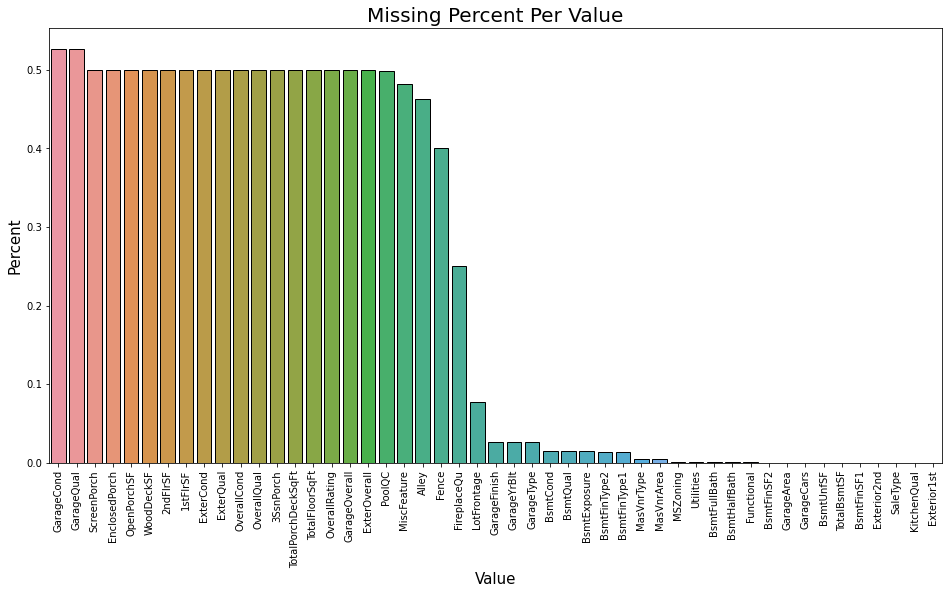

In [428]:
f, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=missing_table.index, y=missing_table['missing percent'], edgecolor = 'black')
plt.title('Missing Percent Per Value', size=20)
plt.xlabel('Value', size=15)
plt.ylabel('Percent', size=15)
plt.xticks(rotation='90')
plt.show()

/Users/meganresurreccion/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meganresurreccion/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meganresurreccion/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

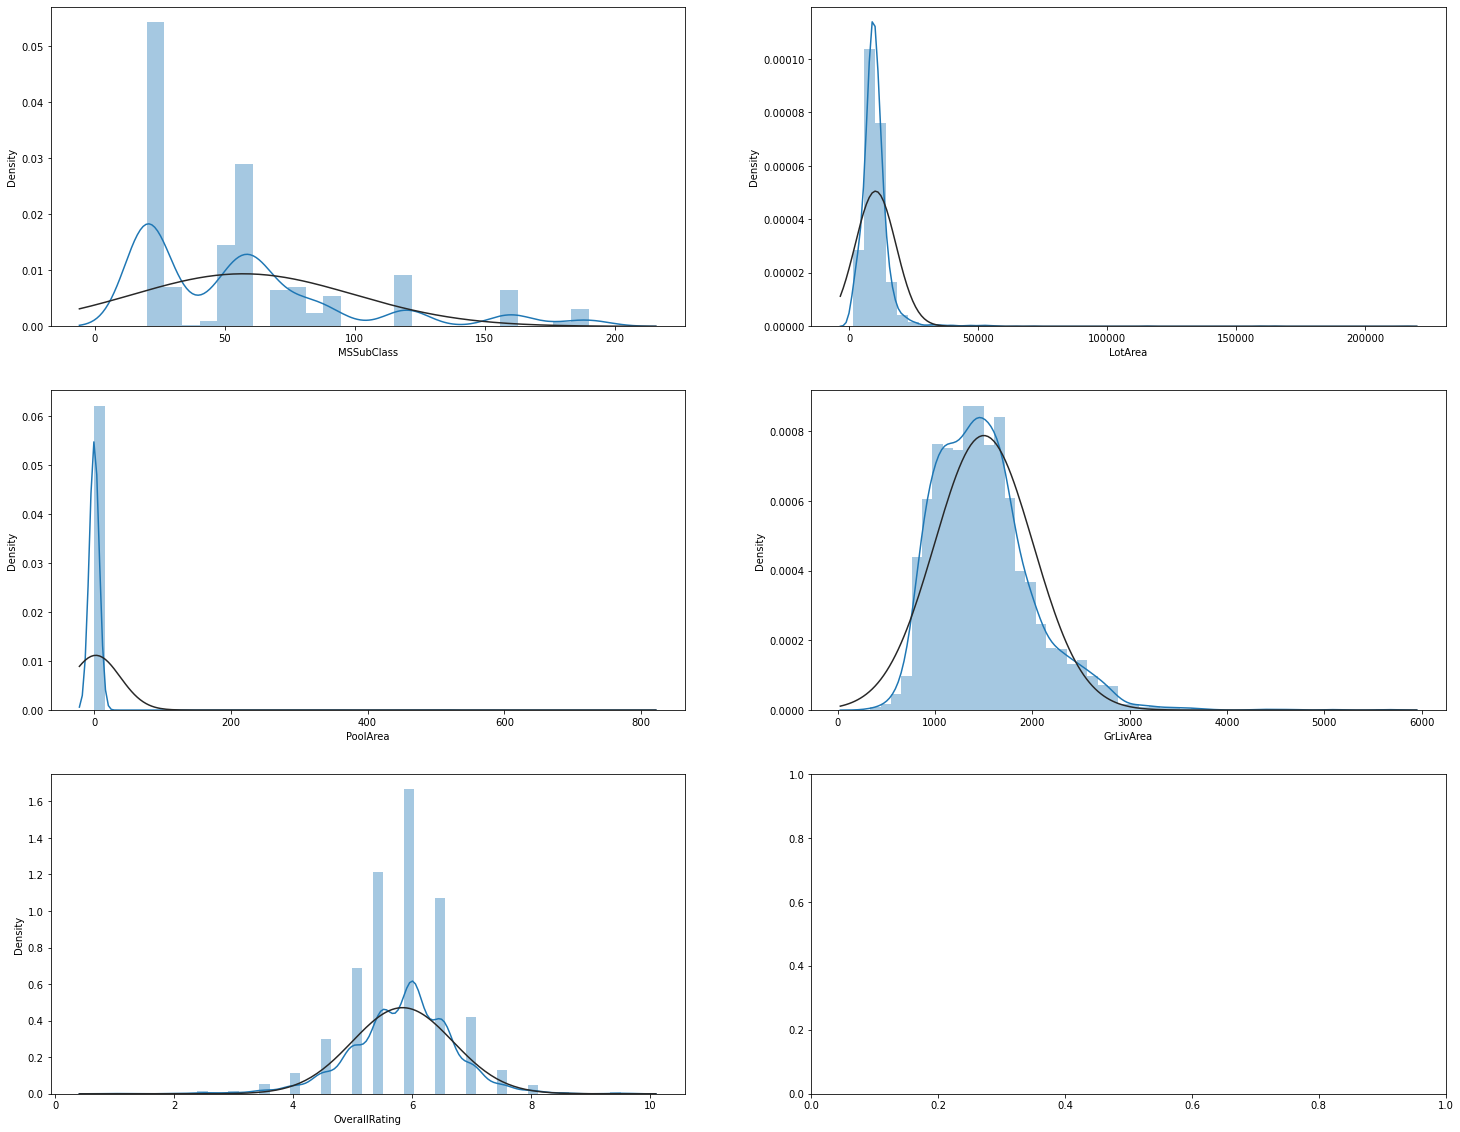

In [430]:
f, ax = plt.subplots(3, 2, figsize=(25, 20))
for i, c in enumerate(features):
    sns.distplot(all_data[c], fit=norm, ax=ax[i//2, i%2])

In [431]:
knn_score = model.score(x_test, y_test)
print(knn_score)

0.3095890410958904


In [432]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


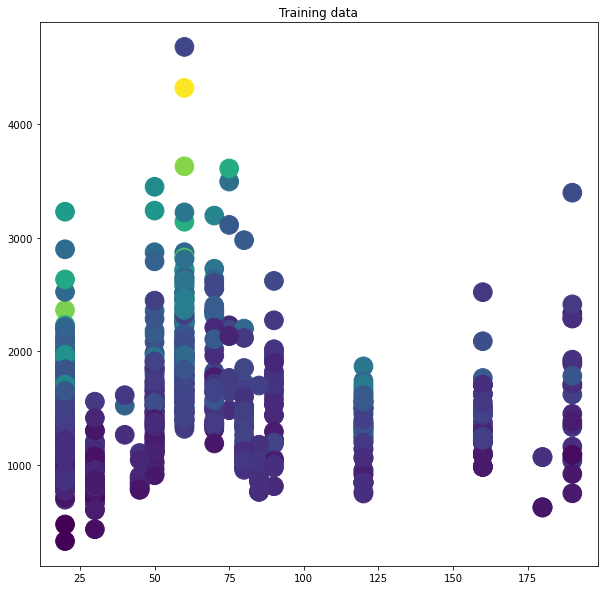

In [433]:
plt.figure(figsize=(10,10))g
plt.scatter(x_train.iloc[:,0:1], x_train.iloc[:,3:4], c=y_train[:], s=350, cmap='viridis')
plt.title('Training data')
plt.show()

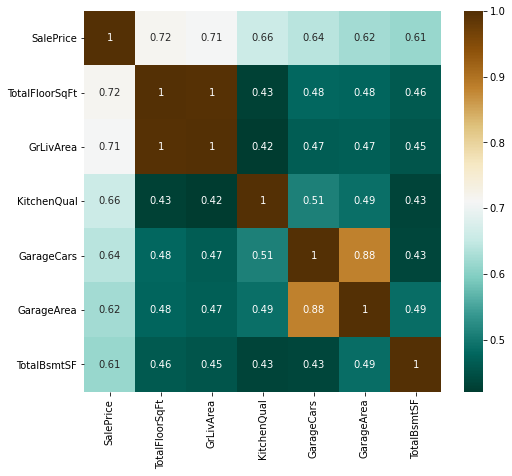

In [434]:
f, ax = plt.subplots(figsize=(8, 7))
highcorr_vars = (abs(train_df.corr().SalePrice).sort_values(ascending=False)[:7]).index
sns.heatmap(train_df[highcorr_vars].corr(), annot=True, cmap = 'BrBG_r')
plt.show()

## Summary
After looking at the train data set, we decided to analyze the set by using various algorithmic methods. I used KNN Algorithms on the following features MSSubClass, LotArea, PoolArea, OverallRating, etc...


The result was quite unique showing that OverallQual and GrLivArea actually had the biggest impact on the algorithm and this might arise some issues due to the fact that strong variables might really affect the linearity of the whole data set when calculating for the accuracy score of 0.309589

# Machine Learning Algorithm 3: Linear Regression (Megan)

**Initial Features and Target Feature**

In [435]:
train_feats = train_df[['MSSubClass','LotArea','Utilities',
                       'YearBuilt','YearRemodAdd','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','CentralAir','LowQualFinSF',
                        'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                        'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','PoolQC','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt','GarageOverall','PavedDrive','TotalPorchDeckSqFt',
                       'ExterOverall']]
train_target = train_df['SalePrice']

## Initial Linear Regression Test

In [436]:
X = train_feats[['MSSubClass','LotArea','Utilities',
                       'YearBuilt','YearRemodAdd','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','CentralAir','LowQualFinSF',
                        'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                        'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','PoolQC','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt','GarageOverall','PavedDrive','TotalPorchDeckSqFt',
                       'ExterOverall']].values
y = train_df['SalePrice'].values

In [437]:
X.shape

(1460, 42)

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [439]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [440]:
y_pred = regressor.predict(X_test)


In [441]:
train_res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
train_res.head(15)

,Actual,Predicted
0,200624,"218,588.55"
1,133000,"135,623.76"
2,110000,"102,323.48"
3,192000,"215,573.86"
4,88000,"83,369.45"
5,85000,"55,251.01"
6,282922,"255,987.85"
7,141000,"152,060.97"
8,745000,"495,026.98"
9,148800,"147,158.36"


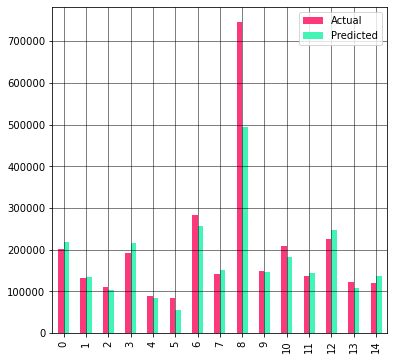

In [496]:
train_res = train_res.head(15)
train_res.plot(kind='bar',figsize=(6,6),color=['#fc3a7b','#42f5b6'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

In [443]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 22434.368427105073
R-squared Error: 0.6634509613293098


Mean Absolute Error is about 22,434.36. R-squared Error is about 0.6634. The model was close in predicting some of the actual values but is overall not that accurate. We will use some dimensionality reduction techniques to see if we can improve the model.

## Attempt to Improve Linear Regression Test 1
Use variance check with features and remove features with low variance.


**Check Feature Variance**

In [444]:
train_df.var()


Id                         177,755.00
MSSubClass                   1,789.34
LotArea                 99,625,649.65
Utilities                        0.00
YearBuilt                      912.22
YearRemodAdd                   426.23
BsmtQual                         0.77
BsmtCond                         0.30
BsmtExposure                     1.14
BsmtFinSF1                 208,025.47
BsmtFinSF2                  26,023.91
BsmtUnfSF                  195,246.41
TotalBsmtSF                192,462.36
HeatingQC                        0.92
CentralAir                       0.06
LowQualFinSF                 2,364.20
GrLivArea                  276,129.63
BsmtFullBath                     0.27
BsmtHalfBath                     0.06
FullBath                         0.30
HalfBath                         0.25
BedroomAbvGr                     0.67
KitchenAbvGr                     0.05
KitchenQual                      0.44
TotRmsAbvGrd                     2.64
Functional                       0.45
Fireplaces  

Select features that all have a variance greater than 0.5.


In [445]:
train_feats1 = train_df[['MSSubClass','LotArea',
                       'YearBuilt','YearRemodAdd','BsmtQual',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','LowQualFinSF',
                        'GrLivArea',
                        'BedroomAbvGr','TotRmsAbvGrd',
                        'FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt']]

In [446]:
train_feats1.shape


(1460, 24)

In [447]:
A = train_feats1[['MSSubClass','LotArea',
                       'YearBuilt','YearRemodAdd','BsmtQual',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','LowQualFinSF',
                        'GrLivArea',
                        'BedroomAbvGr','TotRmsAbvGrd',
                        'FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt']].values
b = train_df['SalePrice'].values

In [448]:
A.shape

(1460, 24)

In [449]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)


In [450]:
regressor.fit(A_train, b_train)

LinearRegression()

In [451]:
b_pred = regressor.predict(A_test)

In [452]:
train_res1 = pd.DataFrame({'Actual': b_test.flatten(), 'Predicted': b_pred.flatten()})
train_res1.head(15)

,Actual,Predicted
0,200624,"251,926.68"
1,133000,"147,765.93"
2,110000,"95,674.03"
3,192000,"221,653.77"
4,88000,"84,976.91"
5,85000,"74,726.52"
6,282922,"255,312.11"
7,141000,"138,881.48"
8,745000,"512,623.12"
9,148800,"139,527.76"


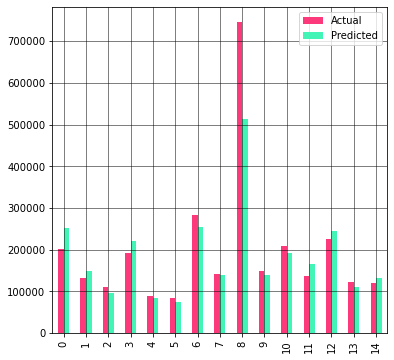

In [498]:
train_res1 = train_res1.head(15)
train_res1.plot(kind='bar',figsize=(6,6),color=['#fc3a7b','#42f5b6'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

In [454]:
print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, b_pred))  
print('R-squared Error:', metrics.r2_score(b_test, b_pred))

Mean Absolute Error: 23314.538395248986
R-squared Error: 0.6519945303565691


Mean Absolute Error is about 23,314.53. R-squared Error is about 0.6519. Compared to the inital model, this model is less accurate, albeit by very little. We will attempt to improve the model more.

## Attempt to Improve Linear Regression Test 2

Select features that all have a variance greater than 1.0 as opposed to just 0.5. We also remove some features we feel may have less importance than others.

In [455]:
train_feats2 = train_df[['MSSubClass','LotArea',
                       'YearRemodAdd',
                       'BsmtExposure',
                        'TotalBsmtSF','LowQualFinSF',
                        'GrLivArea',
                        'TotRmsAbvGrd',
                        'FireplaceQu', 'GarageArea',
                        'PoolArea','Fence','MiscVal','TotalFloorSqFt',
                        'TotalPorchDeckSqFt']]


Standardize Features with StandardScaler

In [456]:
scaler = StandardScaler()
scaler.fit(train_feats2)
x_scale = scaler.transform(train_feats2)
data_scale = pd.DataFrame(x_scale, columns=train_feats2.columns)
data_scale.head(5)

,MSSubClass,LotArea,YearRemodAdd,BsmtExposure,TotalBsmtSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,FireplaceQu,GarageArea,PoolArea,Fence,MiscVal,TotalFloorSqFt,TotalPorchDeckSqFt
0,0.07,-0.21,0.88,-0.59,-0.46,-0.12,0.37,0.91,-1.01,0.35,-0.07,-0.47,-0.09,0.38,-0.77
1,-0.87,-0.09,-0.43,2.22,0.47,-0.12,-0.48,-0.32,0.65,-0.06,-0.07,-0.47,-0.09,-0.48,0.75
2,0.07,0.07,0.83,0.35,-0.31,-0.12,0.52,-0.32,0.65,0.63,-0.07,-0.47,-0.09,0.53,-0.89
3,0.31,-0.10,-0.72,-0.59,-0.69,-0.12,0.38,0.30,1.20,0.79,-0.07,-0.47,-0.09,0.40,0.80
4,0.07,0.38,0.73,1.28,0.20,-0.12,1.30,1.53,0.65,1.70,-0.07,-0.47,-0.09,1.32,0.60


Implement PCA as an Additional Dimensionality Reduction Technique

In [457]:
pca = PCA()
x_pca = pca.fit_transform(data_scale)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.22,0.63,-1.05,-0.39,0.07,-0.47,0.51,0.81,0.86,0.85,0.03,-0.13,-0.34,-0.21,0.00
1,0.26,-1.84,0.56,0.44,-0.10,0.80,-0.09,-0.59,-0.68,-0.78,-0.77,-0.64,-0.91,-0.17,-0.00
2,0.68,-0.37,-0.89,-0.04,0.05,-0.10,0.18,0.46,0.36,-0.52,0.78,0.13,-0.48,0.72,0.00
3,0.79,0.65,-0.36,-0.41,-0.07,-0.12,-0.79,-0.37,-1.12,-0.25,0.11,1.04,-0.53,0.02,0.00
4,3.12,-0.26,-0.67,0.17,0.08,0.09,-0.05,-0.12,0.48,0.05,-0.30,0.34,-1.12,-0.18,0.00


In [458]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.82089975e-01, 1.01853043e-01, 8.66345537e-02, 7.09505306e-02,
       6.69158955e-02, 6.49601188e-02, 5.96237673e-02, 5.60029910e-02,
       4.84890364e-02, 4.51343165e-02, 4.15048929e-02, 3.55921349e-02,
       2.78544589e-02, 1.23942860e-02, 7.93714602e-33])

In [459]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28208997, 0.38394302, 0.47057757, 0.5415281 , 0.608444  ,
       0.67340412, 0.73302788, 0.78903087, 0.83751991, 0.88265423,
       0.92415912, 0.95975126, 0.98760571, 1.        , 1.        ])

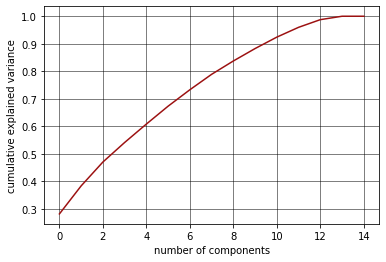

In [503]:
plt.plot(np.arange(15), np.cumsum(pca.explained_variance_ratio_),color='#9c1111')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

In [461]:
train_feats2 = train_df[['MSSubClass','LotArea',
                       'YearRemodAdd',
                       'BsmtExposure',
                        'TotalBsmtSF','LowQualFinSF',
                        'GrLivArea',
                        'TotRmsAbvGrd',
                        'FireplaceQu', 'GarageArea']]

In [462]:
C = train_feats2[['MSSubClass','LotArea',
                       'YearRemodAdd',
                       'BsmtExposure',
                        'TotalBsmtSF','LowQualFinSF',
                        'GrLivArea',
                        'TotRmsAbvGrd',
                        'FireplaceQu', 'GarageArea']].values
d = train_df['SalePrice'].values

In [463]:
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2, random_state=0)

In [464]:
regressor = LinearRegression()  
regressor.fit(C_train, d_train)

LinearRegression()

In [465]:
d_pred = regressor.predict(C_test)

In [466]:
train_res2 = pd.DataFrame({'Actual': d_test.flatten(), 'Predicted': d_pred.flatten()})
train_res2.head(15)

,Actual,Predicted
0,200624,"285,218.43"
1,133000,"135,027.64"
2,110000,"112,729.02"
3,192000,"213,501.92"
4,88000,"78,254.29"
5,85000,"141,072.07"
6,282922,"248,969.79"
7,141000,"144,450.80"
8,745000,"481,603.85"
9,148800,"125,124.48"


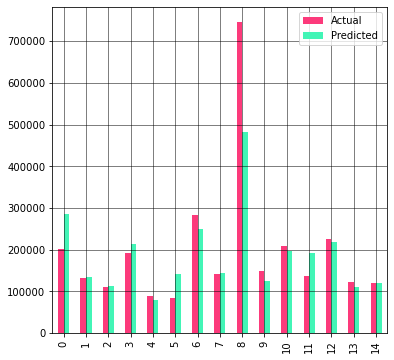

In [497]:
train_res2 = train_res2.head(15)
train_res2.plot(kind='bar',figsize=(6,6),color=['#fc3a7b','#42f5b6'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

In [468]:
print('Mean Absolute Error:', metrics.mean_absolute_error(d_test, d_pred))  
print('R-squared Error:', metrics.r2_score(d_test, d_pred))

Mean Absolute Error: 27868.338811908703
R-squared Error: 0.5971859351408314


After another attempt, we unfortunately find that the model is worse than originally used, particularly with an increased Mean Absolute Error value and decreased R-squared error.

## Attempt to Improve Linear Regression Test 3

In [469]:
E = train_df[['MSSubClass','LotArea','Utilities','OverallRating',
                       'YearBuilt','ExterOverall','BsmtQual','BsmtCond',
                       'BsmtExposure','TotalBsmtSF','HeatingQC','CentralAir',
                        'TotalFloorSqFt','GrLivArea','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars',
                        'GarageOverall','PavedDrive','TotalPorchDeckSqFt']].values
f = train_df['SalePrice'].values

In [470]:
E_train, E_test, f_train, f_test = train_test_split(E, f, test_size=0.2, random_state=0)

In [471]:
regressor.fit(E_train, f_train)


LinearRegression()

In [472]:
f_pred = regressor.predict(E_test)
train_res3 = pd.DataFrame({'Actual': f_test.flatten(), 'Predicted': f_pred.flatten()})
train_res3.head(15)

,Actual,Predicted
0,200624,"232,685.13"
1,133000,"145,814.13"
2,110000,"110,370.98"
3,192000,"217,180.12"
4,88000,"81,228.14"
5,85000,"60,434.90"
6,282922,"260,743.24"
7,141000,"149,101.50"
8,745000,"495,205.31"
9,148800,"146,731.16"


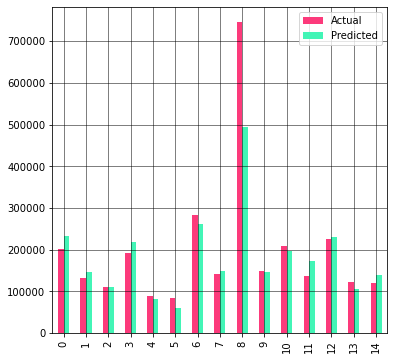

In [499]:
train_res3 = train_res3.head(15)
train_res3.plot(kind='bar',figsize=(6,6),color=['#fc3a7b','#42f5b6'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

In [507]:
print('Mean Absolute Error:', metrics.mean_absolute_error(f_test, f_pred))  
print('R-squared Error:', metrics.r2_score(f_test, f_pred))

Mean Absolute Error: 23605.79783977028
R-squared Error: 0.6991839509902085


## Summary
After playing around with different features, we found that we could best improve the original model with the features shown above. The r-squared error is higher than it was in the original model with 0.699, even though that means the model is still not accurate. It is possible that linear regression is not the best model for predicting the sale prices of houses in this dataset.